# E-commerce Product Recommendation System

- Name: Nyein Chan Aung
- Student ID: st125553

In [258]:
# # connect with google
# from google.colab import drive
# drive.mount('/content/drive')

# # Mount drive folder with os
# import os
# os.chdir('/content/drive/MyDrive/CP4DSAI/_Project/_onlineSalePattern/')

## import required library

In [259]:
#Library for edit dataset
import pandas as pd
import numpy as np
import datetime as dp

#Library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

!pip install plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots


!pip install folium
import folium
from folium.plugins import StripePattern
import branca.colormap
from collections import defaultdict
from folium.plugins import HeatMap

#Calculate distance on latitude and longitude
from math import radians, cos, sin, asin, sqrt

#Library to find correlation in categorical data
from pandas import factorize

# Modeling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.utils import resample

import matplotlib.pyplot as plt
!pip install squarify
import squarify
warnings.filterwarnings('ignore')

### Load Dataset

In [260]:
Amazon_df = pd.read_csv('data/AmazonSalesFY2020-21.csv')
Amazon_df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [261]:
Amazon_df.dtypes

order_id             object
order_date           object
status               object
item_id               int64
sku                  object
qty_ordered           int64
price               float64
value               float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
cust_id               int64
year                  int64
month                object
ref_num               int64
Name Prefix          object
First Name           object
Middle Initial       object
Last Name            object
Gender               object
age                   int64
full_name            object
E Mail               object
Sign in date         object
Phone No.            object
Place Name           object
County               object
City                 object
State                object
Zip                   int64
Region               object
User Name            object
Discount_Percent    float64
dtype: object

## Data Cleansing

In [262]:
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [263]:
Amazon_df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [264]:
# change column name
new_columns={"Name Prefix": "name_prefix",
         "First Name": "first_name",
         "Middle Initial":"middle_name",
         "Last Name": "last_name",
         "Gender":"gender",
         "E Mail":"email",
         "Sign in date":"sign_in_date",
         "Phone No. ":"phone_no",
         "Place Name":"place_name",
         "County":"country",
         "City":"city",
         "State":"state",
         "Zip":"zip",
         "Region":"region",
         "User Name":"user_name",
         "Discount_Percent":"discount_percent"
         }
Amazon_df = Amazon_df.rename(columns=new_columns)

In [265]:
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

According to the information from data, following data need to be cleaned or update.
- **String to integer**
- order_id
- month

- **Stream to datetime**
- order_date

- **Label Encoding**
- order_status
- payment_method

- **Change Label**
- Phone No . -> Phone_Number

In [266]:
# Change Order ID data type into integer
#Amazon_df.order_id =  pd.to_numeric(Amazon_df.order_id, errors='coerce')

In [267]:
# Change data format
print(Amazon_df[['order_date','year','month']].head())

   order_date  year   month
0  01/10/2020  2020  Oct-20
1  01/10/2020  2020  Oct-20
2  01/10/2020  2020  Oct-20
3  01/10/2020  2020  Oct-20
4  13/11/2020  2020  Nov-20


In [268]:
# Convert order_date, year and month to datetime format
Amazon_df['order_date'] = pd.to_datetime(Amazon_df['order_date'], format='%d/%m/%Y')
# Convert 'order_date' to datetime format
Amazon_df['order_date'] = pd.to_datetime(Amazon_df['order_date'], format='%d/%m/%Y')
# Convert 'month' to datetime format and extract YYYY-MM format
Amazon_df['month'] = pd.to_datetime(Amazon_df['month'], format='%b-%y').dt.to_period('M')

# Print to verify changes
print(Amazon_df[['order_date', 'year', 'month']].head())

  order_date  year    month
0 2020-10-01  2020  2020-10
1 2020-10-01  2020  2020-10
2 2020-10-01  2020  2020-10
3 2020-10-01  2020  2020-10
4 2020-11-13  2020  2020-11


In [269]:
Amazon_df.describe()

,order_date,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,zip,discount_percent
count,286392,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,2021-03-12 11:18:32.008715264,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
min,2020-10-01 00:00:00,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,2020-12-24 00:00:00,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,2021-03-16 00:00:00,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,2021-05-18 00:00:00,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,2021-09-30 00:00:00,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000
std,NaN,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100


In [270]:
# Check for duplicates
Amazon_df.duplicated().sum()

0

In [271]:
# Check for NaNs
Amazon_df.isna().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
name_prefix         0
first_name          0
middle_name         0
last_name           0
gender              0
age                 0
full_name           0
email               0
sign_in_date        0
phone_no            0
place_name          0
country             0
city                0
state               0
zip                 0
region              0
user_name           0
discount_percent    0
dtype: int64

In [272]:
len(Amazon_df.category.unique())

15

## Data Pre-processing/  Exploratory Data Analysis

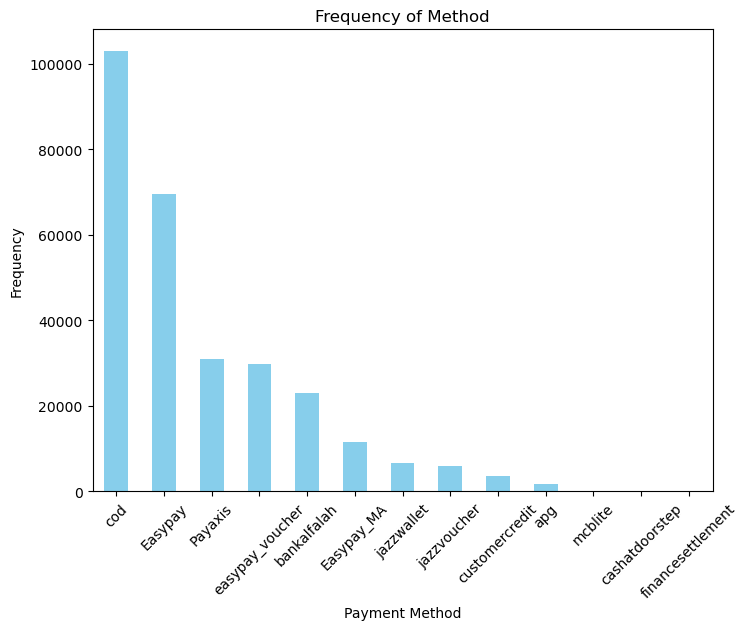

In [273]:
# count the frequency of each unique category in the 'payment_type' column
payment_method_count = Amazon_df.payment_method.value_counts()

# # Create bar plot
plt.figure(figsize=(8, 6))
payment_method_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.show()

In [274]:
# customer location
print("Unique State", len(Amazon_df.state.unique()))
print("Unique City", len(Amazon_df.city.unique()))
print("Unique Region", len(Amazon_df.region.unique()))


Unique State 51
Unique City 15892
Unique Region 4


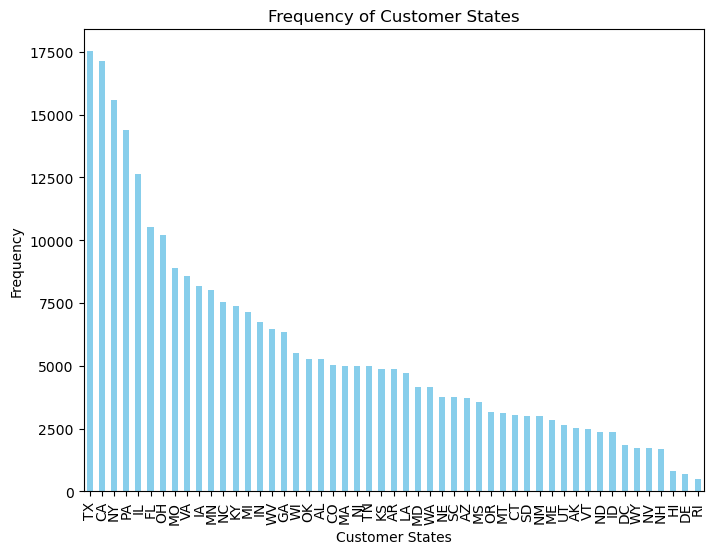

In [275]:
# count the frequency of each unique category in the 'customer_state' column
states_count = Amazon_df.state.value_counts()

# Create bar plot
plt.figure(figsize=(8, 6))
states_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Customer States')
plt.xlabel('Customer States')
plt.ylabel('Frequency')
plt.show()

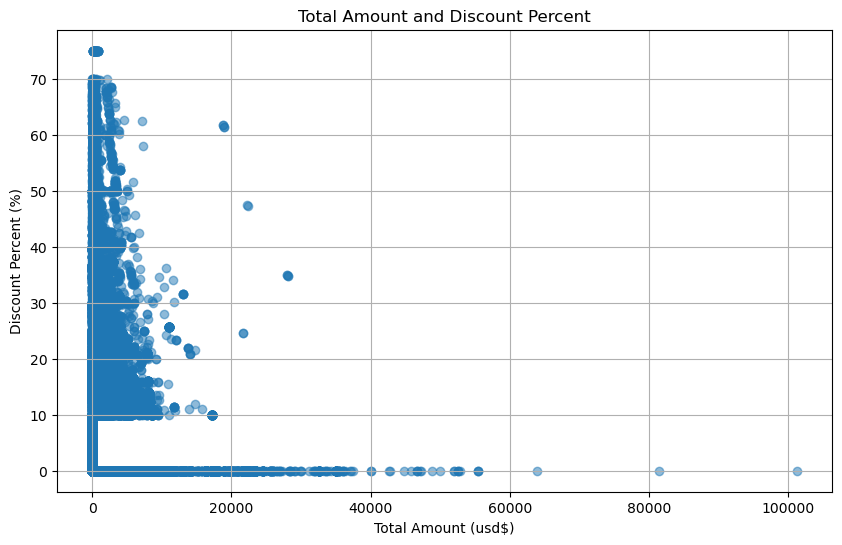

In [276]:
# scatter chart for city and total amount
plt.figure(figsize=(10, 6))
plt.scatter(Amazon_df.total, Amazon_df.discount_percent, alpha=0.5)
plt.title('Total Amount and Discount Percent')
plt.xlabel('Total Amount (usd$)')
plt.ylabel('Discount Percent (%)')
plt.grid(True)
plt.show()

In [277]:
len(Amazon_df.sku.unique())

47932

In [278]:
len(Amazon_df.item_id.unique())

286392

In [279]:
# Check for outliers
Q1 = Amazon_df['total'].quantile(0.25)
Q3 = Amazon_df['total'].quantile(0.75)
IQR = Q3 - Q1
outliers = Amazon_df[(Amazon_df['total'] < (Q1 - 1.5 *IQR)) | (Amazon_df['total'] > (Q3 + 1.5 * IQR))]

print(outliers)

         order_id order_date          status  item_id                    sku  \
31      100359410 2020-10-24        complete   583004    APPANE59BD020E370CC   
32      100359558 2020-10-25        complete   583239    APPLIO59BA25191179A   
48      100354685 2020-10-01        canceled   574788  cc_samsung_a320-black   
52      100354687 2020-10-01  order_refunded   574790            FHM_ECLIPSE   
90      100441393 2021-02-01        canceled   723634    APPORI5A433F2870FC6   
...           ...        ...             ...      ...                    ...   
286358  100562306 2021-09-29        canceled   905095    MATSAM5B1E11184A809   
286370  100562318 2021-09-30        canceled   905118    HASBUT5AD49E3203D7C   
286384  100562362 2021-09-30        canceled   905174    MATSAM5B6D7208C6D30   
286387  100562365 2021-09-30            paid   905179    APPCHA5AF14939B8F8A   
286391  100562386 2021-09-30      processing   905205    MATHUA5AF70A7D1E50A   

        qty_ordered    price    value  

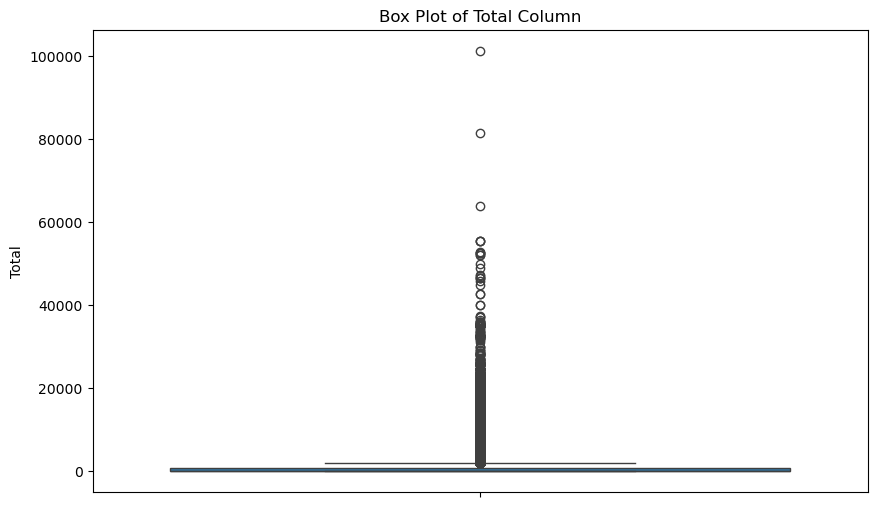

In [280]:
# Box plot to visualize outliers with vertical orientation
plt.figure(figsize=(10, 6))
sns.boxplot(y=Amazon_df['total'])
plt.title('Box Plot of Total Column')
plt.ylabel('Total')
plt.show()

In [281]:
Amazon_df.to_csv("data/_cleaned_df.csv")

## Customer Segmentation (Baseline Model)

### Calculate Recency Score

In [282]:
# Get the most current order by customer
last_cus_order = Amazon_df.groupby(['cust_id', 'full_name']) ['order_date'].max().reset_index()
recency_table = last_cus_order.copy()

current_date = Amazon_df['order_date'].max()
recency_table['days_since_last_order'] = (current_date - recency_table['order_date']).dt.days
recency_table

,cust_id,full_name,order_date,days_since_last_order
0,4,"Doughty, Reggie",2021-09-29,1
1,15,"Diebold, Debbie",2021-02-11,231
2,16,"Sturtevant, Michal",2020-11-12,322
3,20,"Pulver, Eddy",2021-09-29,1
4,21,"Kan, Adam",2021-02-03,239
...,...,...,...,...
64243,115322,"Nowak, Shaina",2021-09-30,0
64244,115323,"Latham, Brady",2021-09-30,0
64245,115324,"Brunetti, Bennie",2021-09-30,0
64246,115325,"Giusti, Francesca",2021-09-30,0


In [283]:
# Define function that scores the data
def scoring(x):
    #Calculate quantiles
    quan_val_list = []
    for quan in [0.2, 0.4, 0.6, 0.8]:
        quan_val_list.append(np.quantile(x, quan))
    # Label the data based on the quantile data
    def labeling(x):
        if x < quan_val_list[0]: return 1
        elif x < quan_val_list[1]: return 2
        elif x < quan_val_list[2]: return 3
        elif x < quan_val_list[3]: return 4
        else: return 5

    return x.apply(labeling)

recency_table['recency_score'] = scoring(recency_table['days_since_last_order'])

print(recency_table[['cust_id', 'full_name', 'order_date','recency_score']].head())

   cust_id           full_name order_date  recency_score
0        4     Doughty, Reggie 2021-09-29              1
1       15     Diebold, Debbie 2021-02-11              3
2       16  Sturtevant, Michal 2020-11-12              5
3       20        Pulver, Eddy 2021-09-29              1
4       21           Kan, Adam 2021-02-03              4


In [284]:
# Calculate value counts of recency_score and sort by counts (descending)
score_counts = recency_table['recency_score'].value_counts().sort_values(ascending=False)

score_counts

recency_score
5    13777
2    12950
3    12909
1    12668
4    11944
Name: count, dtype: int64

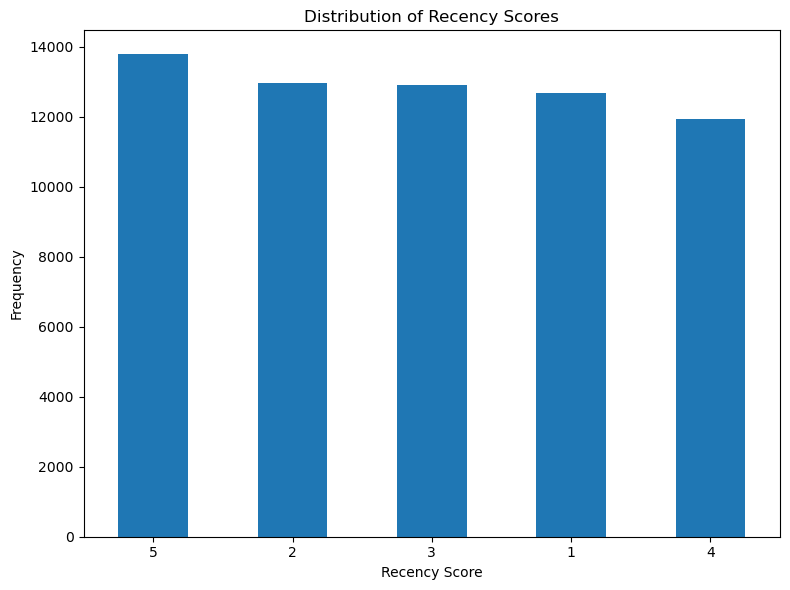

In [285]:
#Plotting the bar graph
plt.figure(figsize=(8, 6))
score_counts.plot(kind='bar')

# Customizing the plot
plt.title('Distribution of Recency Scores')
plt.xlabel('Recency Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display the plot
plt.tight_layout()
plt.show()

### Calculate Frequency Score

In [286]:
# Create a frequerncy_tabel
frequency_table = Amazon_df.groupby(['cust_id', 'full_name']).agg({'order_date':['min', 'max'], 'order_id': 'count'}).reset_index()

# Change column names order_date min to start, order_date max to end and order_id count to count
frequency_table.columns=['cust_id', 'full_name', 'start', 'end', 'count']

# Add duration end - start
frequency_table['duration'] = (frequency_table['end'] - frequency_table['start']).apply(lambda x: int(str(x).split()[0]))

# Add calculation for puchase rate count / duration
frequency_table['purchase_rate'] = frequency_table['count']/frequency_table['duration']

# Filter out duration 0
frequency_table = frequency_table [frequency_table['duration'] > 0]

# Apply scoring to purchase_rate and add column frequency_score
frequency_table['frequency_score'] = scoring(frequency_table['purchase_rate'])

frequency_table


,cust_id,full_name,start,end,count,duration,purchase_rate,frequency_score
0,4,"Doughty, Reggie",2020-11-13,2021-09-29,41,320,0.128125,2
1,15,"Diebold, Debbie",2020-10-08,2021-02-11,6,126,0.047619,1
2,16,"Sturtevant, Michal",2020-10-01,2020-11-12,20,42,0.476190,4
3,20,"Pulver, Eddy",2021-03-20,2021-09-29,11,193,0.056995,1
5,23,"Bostwick, Roscoe",2020-11-15,2021-08-07,6,265,0.022642,1
...,...,...,...,...,...,...,...,...
64070,115149,"Poe, Mae",2021-09-26,2021-09-27,8,1,8.000000,5
64091,115170,"Tremaine, Rene",2021-09-27,2021-09-28,2,1,2.000000,5
64116,115195,"Daddario, Christi",2021-09-27,2021-09-28,11,1,11.000000,5
64144,115223,"Bullion, Edgardo",2021-09-28,2021-09-29,3,1,3.000000,5


### Calculate Monetary Table

In [287]:
# Create a monetary_table
monetary_table = Amazon_df.groupby(['cust_id', 'full_name']).agg({'total':'sum'}).reset_index()

# Create column 'monetary_score' by applying scoring to total
monetary_table['monetary_score'] = scoring(monetary_table['total'])

monetary_table

,cust_id,full_name,total,monetary_score
0,4,"Doughty, Reggie",27394.190,5
1,15,"Diebold, Debbie",216.800,2
2,16,"Sturtevant, Michal",11868.899,5
3,20,"Pulver, Eddy",28719.018,5
4,21,"Kan, Adam",105.000,2
...,...,...,...,...
64243,115322,"Nowak, Shaina",209.600,2
64244,115323,"Latham, Brady",4419.900,5
64245,115324,"Brunetti, Bennie",39.900,1
64246,115325,"Giusti, Francesca",89.900,1


In [288]:
# Check for duplicates in recency_table
print(recency_table['cust_id'].duplicated().sum())

# Check for duplicates in frequency_table
print(frequency_table['cust_id'].duplicated().sum())

# Check for dulpicates in monetary_table
print(monetary_table['cust_id'].duplicated().sum())


0
0
0


In [289]:
# Add segment dictionary
segment_dict = {
    # Hibernating
    (1, 1): "hibernating",
    (1, 2): "hibernating",
    (2, 1): "hibernating",
    (2, 2): "hibernating",
    # About to sleep
    (3, 1): "about to sleep",
    (3, 2): "about to sleep",
    # Promising
    (4, 1): "promising",
    # New Customer
    (5, 1): "new customer",
    # Potential Customers
    (4, 2): "potential customer",
    (4, 3): "potential customer",
    (5, 2): "potential customer",
    (5, 3): "potential customer",
    # Need attention
    (3, 3): "need attention",
    # At risk
    (1, 3): "at risk",
    (1, 4): "at risk",
    (2, 3): "at risk",
    (2, 4): "at risk",
    # Do not lose
    (1, 5): "do not lose",
    (2, 5): "do not lose",
    # Loyal customer
    (3, 4): "loyal customer",
    (3, 5): "loyal customer",
    (4, 4): "loyal customer",
    (4, 5): "loyal customer",
    # Champions
    (5, 4): "champions",
    (5, 5): "champions"}


In [290]:
# Create a final_table that has recency_score, _frequency_score and monetary_score
final_table = frequency_table.merge(recency_table, on='cust_id').merge(monetary_table, on='cust_id')

final_table = final_table[['cust_id', 'full_name', 'recency_score', 'frequency_score', 'monetary_score']]

# Create new column 'frequency_monetary' by applying scoring and adding frequency_score+ montetary_score
final_table['frequency_monetary'] = scoring(final_table['frequency_score'] + final_table['monetary_score'])

# Apply segment dict and create a segment column
final_table['segment'] = final_table.apply(lambda x:
                 segment_dict[(x['recency_score'],x['frequency_monetary'])], axis=1)

final_table


,cust_id,full_name,recency_score,frequency_score,monetary_score,frequency_monetary,segment
0,4,"Doughty, Reggie",1,2,5,4,at risk
1,15,"Diebold, Debbie",3,1,2,1,about to sleep
2,16,"Sturtevant, Michal",5,4,5,5,champions
3,20,"Pulver, Eddy",1,1,5,3,at risk
4,23,"Bostwick, Roscoe",1,1,4,2,hibernating
...,...,...,...,...,...,...,...
18815,115149,"Poe, Mae",1,5,5,5,do not lose
18816,115170,"Tremaine, Rene",1,5,2,4,at risk
18817,115195,"Daddario, Christi",1,5,4,5,do not lose
18818,115223,"Bullion, Edgardo",1,5,2,4,at risk


In [291]:
final_data = final_table['segment'].value_counts()
final_data

segment
at risk               5256
loyal customer        4548
hibernating           2764
do not lose           1549
champions             1547
potential customer    1411
about to sleep         870
need attention         558
promising              188
new customer           129
Name: count, dtype: int64

[870, 5256, 1547, 1549, 2764, 4548, 558, 129, 1411, 188]
Index(['about to sleep', 'at risk', 'champions', 'do not lose', 'hibernating',
       'loyal customer', 'need attention', 'new customer',
       'potential customer', 'promising'],
      dtype='object', name='segment')


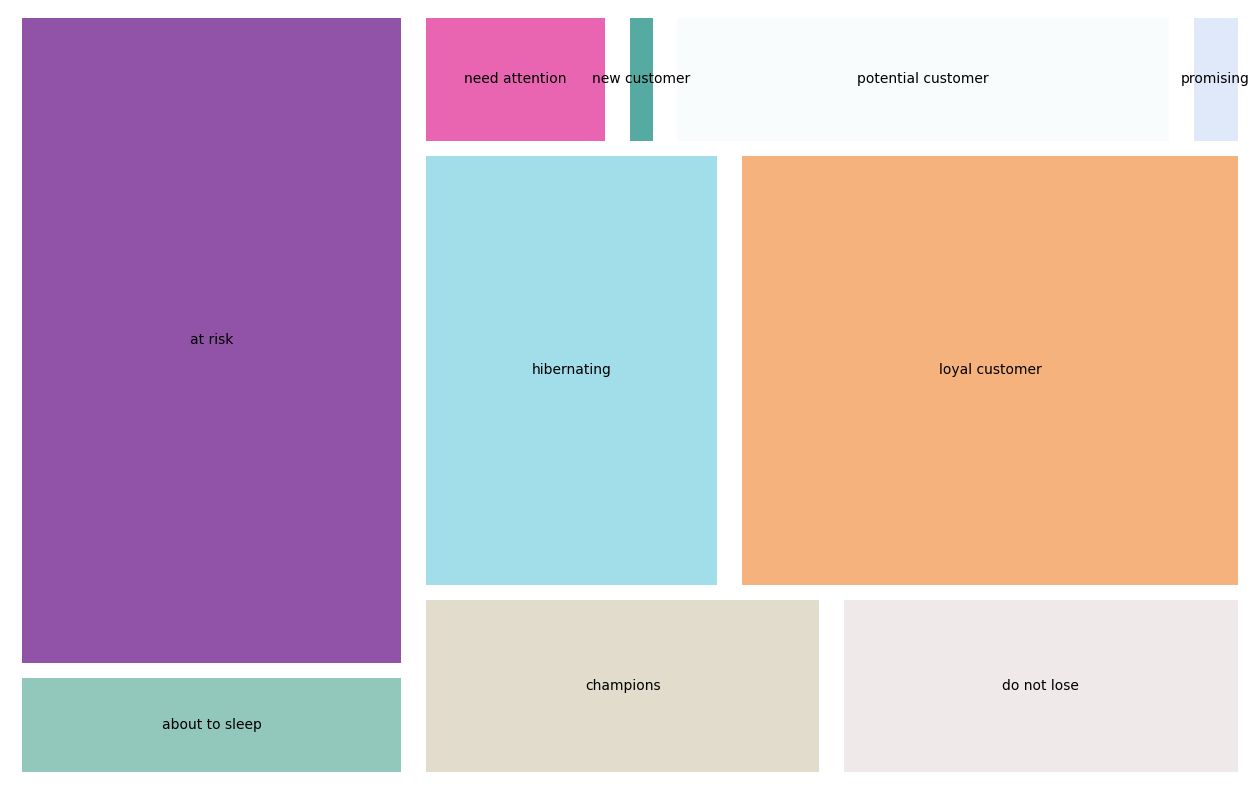

In [292]:
# RFM Result
result = final_table.groupby(['segment'])['segment'].count()
values = list(result)
print(values)
labels = result.index
print(labels)

colors = [list(np.random.uniform(size = 4)) for i in range(len(values))]
# print(colors)

plt.figure(figsize = (16, 10))
squarify.plot(values,color=colors, label = labels, pad = True)
plt.axis('off')
plt.show()


In [293]:
import pandas as pd

# Example final_table DataFrame
data = {
    "cust_id": [4, 15, 16, 20, 23, 115149, 115170, 115195, 115223, 115309],
    "full_name": ["Doughty, Reggie", "Diebold, Debbie", "Sturtevant, Michal", "Pulver, Eddy", "Bostwick, Roscoe",
                  "Poe, Mae", "Tremaine, Rene", "Daddario, Christi", "Bullion, Edgardo", "Cascio, Kendall"],
    "segment": ["at risk", "about to sleep", "champions", "at risk", "hibernating",
                "do not lose", "at risk", "do not lose", "at risk", "at risk"],
    "description": [
        "Customers with low recency but medium frequency and monetary value.",
        "Customers with medium recency but low frequency and monetary value.",
        "Customers with high recency, high frequency, and high monetary value.",
        "Customers with low recency but medium frequency and monetary value.",
        "Customers with low recency, low frequency, and low monetary value.",
        "Customers with low recency but high frequency and monetary value.",
        "Customers with low recency but medium frequency and monetary value.",
        "Customers with low recency but high frequency and monetary value.",
        "Customers with low recency but medium frequency and monetary value.",
        "Customers with low recency but medium frequency and monetary value."
    ],
    "recommendations": [
        "Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.",
        "Offer loyalty programs or rewards for their next purchase. Provide personalized recommendations based on previous purchases.",
        "Offer exclusive access to new products, events, or sales. Provide personalized thank-you notes and exceptional customer service.",
        "Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.",
        "Send re-engagement emails with special offers or discounts. Conduct surveys to understand why they've stopped purchasing.",
        "Offer personalized incentives and discounts to win them back. Provide exceptional customer service to address any issues they may have.",
        "Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.",
        "Offer personalized incentives and discounts to win them back. Provide exceptional customer service to address any issues they may have.",
        "Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.",
        "Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in."
    ]
}

final_table_descr = pd.DataFrame(data)

def highlight_segment(segment):
    if segment == "champions":
        return ['background-color: lightgreen'] * 5
    elif segment == "loyal customer":
        return ['background-color: lightgreen'] * 5
    elif segment == "potential customers":
        return ['background-color: lightgreen'] * 5
    elif segment == "at risk":
        return ['background-color: yellow'] * 5
    elif segment == "do not lose":
        return ['background-color: red'] * 5
    elif segment == "hibernating":
        return ['background-color: lightgrey'] * 5
    elif segment == "about to sleep":
        return ['background-color: lightgrey'] * 5
    else:
        return [''] * 5

styled_table = final_table_descr.style.apply(lambda x: highlight_segment(x['segment']), axis=1)
styled_table

,cust_id,full_name,segment,description,recommendations
0,4,"Doughty, Reggie",at risk,Customers with low recency but medium frequency and monetary value.,Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.
1,15,"Diebold, Debbie",about to sleep,Customers with medium recency but low frequency and monetary value.,Offer loyalty programs or rewards for their next purchase. Provide personalized recommendations based on previous purchases.
2,16,"Sturtevant, Michal",champions,"Customers with high recency, high frequency, and high monetary value.","Offer exclusive access to new products, events, or sales. Provide personalized thank-you notes and exceptional customer service."
3,20,"Pulver, Eddy",at risk,Customers with low recency but medium frequency and monetary value.,Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.
4,23,"Bostwick, Roscoe",hibernating,"Customers with low recency, low frequency, and low monetary value.",Send re-engagement emails with special offers or discounts. Conduct surveys to understand why they've stopped purchasing.
5,115149,"Poe, Mae",do not lose,Customers with low recency but high frequency and monetary value.,Offer personalized incentives and discounts to win them back. Provide exceptional customer service to address any issues they may have.
6,115170,"Tremaine, Rene",at risk,Customers with low recency but medium frequency and monetary value.,Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.
7,115195,"Daddario, Christi",do not lose,Customers with low recency but high frequency and monetary value.,Offer personalized incentives and discounts to win them back. Provide exceptional customer service to address any issues they may have.
8,115223,"Bullion, Edgardo",at risk,Customers with low recency but medium frequency and monetary value.,Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.
9,115309,"Cascio, Kendall",at risk,Customers with low recency but medium frequency and monetary value.,Send win-back campaigns with attractive offers to re-engage them. Highlight any new products or services they might be interested in.


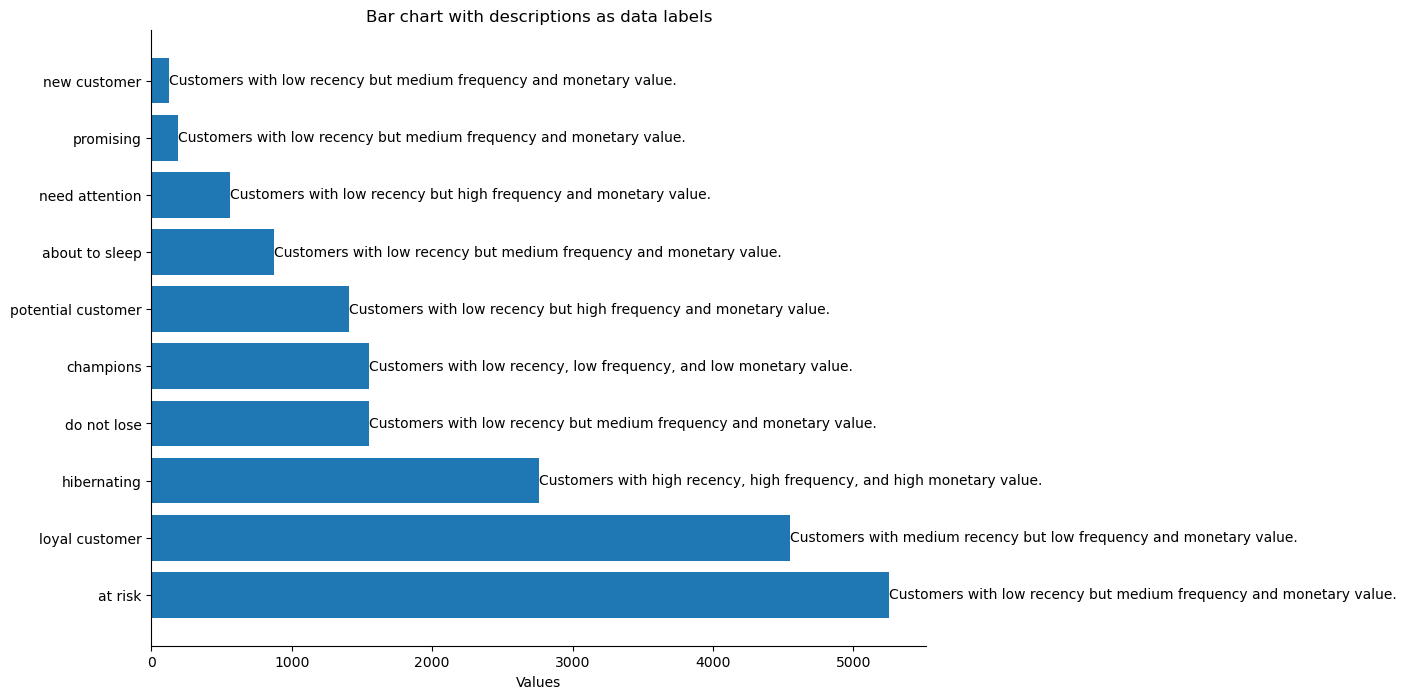

In [294]:
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(
    y = final_data.index,
    width = final_data.values
)

# Adding data labels with descriptions
for bar, desc in zip(bars, final_table_descr['description']):
    ax.text(
        bar.get_width(),         # X coordinate
        bar.get_y() + bar.get_height() / 2,  # Y coordinate
        f'{desc}',               # Text
        va='center',             # Vertical alignment
        ha='left'                # Horizontal alignment
    )

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Values')
ax.set_title('Bar chart with descriptions as data labels')
plt.show()

## Customer Segmentation (Improvement)

### RFM Calculation

In [295]:
# Calculate RFM score for Amazon_df


In [296]:
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          286392 non-null  object        
 1   order_date        286392 non-null  datetime64[ns]
 2   status            286392 non-null  object        
 3   item_id           286392 non-null  int64         
 4   sku               286392 non-null  object        
 5   qty_ordered       286392 non-null  int64         
 6   price             286392 non-null  float64       
 7   value             286392 non-null  float64       
 8   discount_amount   286392 non-null  float64       
 9   total             286392 non-null  float64       
 10  category          286392 non-null  object        
 11  payment_method    286392 non-null  object        
 12  bi_st             286392 non-null  object        
 13  cust_id           286392 non-null  int64         
 14  year

In [297]:
# Set RFM Analysis Data set
recency = Amazon_df[['cust_id', 'order_date']].copy()
recency = recency.groupby('cust_id')['order_date'].max().reset_index()
recency.columns = ['cust_id', 'last_purchase_timestamp']
recency.head()

,cust_id,last_purchase_timestamp
0,4,2021-09-29
1,15,2021-02-11
2,16,2020-11-12
3,20,2021-09-29
4,21,2021-02-03


In [298]:
# Recency, Frequency, Monetary
recency['purchase_int'] = (recency['last_purchase_timestamp'].max() - recency['last_purchase_timestamp']).dt.days
frequency =pd.DataFrame(Amazon_df.groupby('cust_id')['order_id'].count().reset_index())
monetary =pd.DataFrame(Amazon_df.groupby('cust_id')['total'].sum().reset_index())


In [299]:
# Merge
overall = recency.merge(frequency, on='cust_id')
overall = overall.merge(monetary, on='cust_id')

# Rename columns for better intepretation
overall.rename(columns={ 'purchase_int':'recency', 'num_transaction':'frequency','total':'monetary','order_id':'frequency'}, inplace=True)

overall.head()

,cust_id,last_purchase_timestamp,recency,frequency,monetary
0,4,2021-09-29,1,41,27394.190
1,15,2021-02-11,231,6,216.800
2,16,2020-11-12,322,20,11868.899
3,20,2021-09-29,1,11,28719.018
4,21,2021-02-03,239,1,105.000


### Scalling with StandardScaler

In [300]:
# scaling the data
scaled_features = overall[['cust_id','recency','frequency','monetary']].copy()

scaled_features['r'] = StandardScaler().fit_transform(scaled_features[['recency']])
scaled_features['f'] = StandardScaler().fit_transform(scaled_features[['frequency']])
scaled_features['m'] = StandardScaler().fit_transform(scaled_features[['monetary']])
scaled_features = scaled_features.drop(['recency','frequency','monetary'], axis=1)
scaled_features

,cust_id,r,f,m
0,4,-2.135036,2.465659,1.104669
1,15,0.418431,0.104072,-0.159017
2,16,1.428715,1.048707,0.382779
3,20,-2.135036,0.441441,1.166270
4,21,0.507247,-0.233298,-0.164215
...,...,...,...,...
64243,115322,-2.146138,-0.165824,-0.159352
64244,115323,-2.146138,-0.233298,0.036417
64245,115324,-2.146138,-0.233298,-0.167242
64246,115325,-2.146138,-0.165824,-0.164918


### Calculating silhouette_score

In [301]:
from sklearn.metrics import silhouette_score

# Preprocessing
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(scaled_features_minmax)

# Determine optimal clusters
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_features[['m', 'r','f']]) #standard scaler
    score = silhouette_score(scaled_features[['m', 'r','f']], kmeans.labels_)
    silhouette_scores.append(score)
    print(F"silhouette_scores for cluster {n_clusters}: {score}")

# Choose optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(F"optimal_clusters:{optimal_clusters}")

silhouette_scores for cluster 2: 0.9915833212611026
silhouette_scores for cluster 3: 0.5522768123097602
silhouette_scores for cluster 4: 0.5605788866361462
silhouette_scores for cluster 5: 0.5373550194469808
silhouette_scores for cluster 6: 0.5345211595414834
silhouette_scores for cluster 7: 0.5392396207398354
silhouette_scores for cluster 8: 0.5469663630688951
silhouette_scores for cluster 9: 0.551295529178044
optimal_clusters:2


### Kmean Clustering

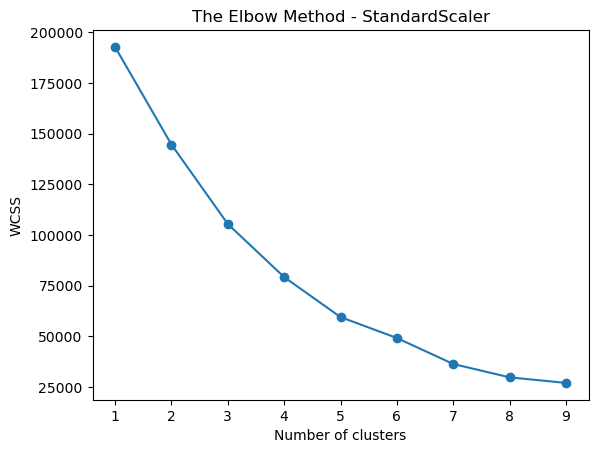

In [302]:
# generate k-mean Elbow chat for scaled_features
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_features[['m', 'r','f']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, '-o')
plt.title('The Elbow Method - StandardScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [303]:
# scaled_features['k_means_clust'] = kmeans.labels_
# scaled_features

In [304]:
# # generate 3D plot with scaled_features_minmax
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import axes3d

# # 3D Scatter Plot
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(scaled_features['recency'],
#                      scaled_features['frequency'],
#                      scaled_features['monetary'],
#                      c=scaled_features['k_means_clust'],
#                      cmap='spring', s=50)

# # Axis Labels
# ax.set_xlabel('Recency')
# ax.set_ylabel('Frequency')
# ax.set_zlabel('Monetary')
# ax.set_title('3D RFM K-Means Clustering')

# plt.show()


### Scaling with MinMaxScaler

In [305]:
# import module
from sklearn.preprocessing import MinMaxScaler
# copy data

scaled_features_minmax = overall[['cust_id','recency','frequency','monetary']].copy()
# scale features
scaled_features_minmax['r'] = MinMaxScaler().fit_transform(scaled_features_minmax[['recency']])
scaled_features_minmax['f'] = MinMaxScaler().fit_transform(scaled_features_minmax[['frequency']])
scaled_features_minmax['m'] = MinMaxScaler().fit_transform(scaled_features_minmax[['monetary']])
scaled_features_minmax = scaled_features_minmax.drop(['recency','frequency','monetary'], axis=1)

# print scaled features
print(scaled_features_minmax)


       cust_id         r         f         m
0            4  0.002747  0.015854  0.014416
1           15  0.634615  0.001982  0.000114
2           16  0.884615  0.007531  0.006246
3           20  0.002747  0.003964  0.015113
4           21  0.656593  0.000000  0.000055
...        ...       ...       ...       ...
64243   115322  0.000000  0.000396  0.000110
64244   115323  0.000000  0.000000  0.002326
64245   115324  0.000000  0.000000  0.000021
64246   115325  0.000000  0.000396  0.000047
64247   115326  0.000000  0.000000  0.001873

[64248 rows x 4 columns]


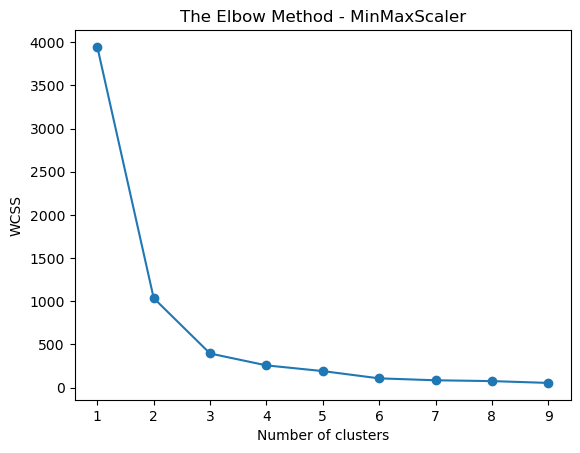

In [306]:
# generate k-mean Elbow chat for scaled_features
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_features_minmax[['r', 'f','m']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, '-o')
plt.title('The Elbow Method - MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=3, max_iter=50)
# kmeans.fit(scaled_features_minmax[['r', 'f','m']])

KMeans(max_iter=50, n_clusters=3)

### Calculating silhouette_score for min-max scaler

In [308]:
from sklearn.metrics import silhouette_score

# Preprocessing
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(scaled_features_minmax)

# Determine optimal clusters
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_features_minmax[['m', 'r','f']])
    score = silhouette_score(scaled_features_minmax[['m', 'r','f']], kmeans.labels_)
    silhouette_scores.append(score)
    print(F"silhouette_scores for cluster {n_clusters}: {score}")

# Choose optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(F"optimal_clusters:{optimal_clusters}")

silhouette_scores for cluster 2: 0.6661860054524471
silhouette_scores for cluster 3: 0.672792639781346
silhouette_scores for cluster 4: 0.6653096892864028
silhouette_scores for cluster 5: 0.6007388562915039
silhouette_scores for cluster 6: 0.6503071188030142
silhouette_scores for cluster 7: 0.6511900634911207
silhouette_scores for cluster 8: 0.6519273665596296
silhouette_scores for cluster 9: 0.6495332471916766
optimal_clusters:3


### Analysis

- RFM results  have different units or ranges 
- According to data distribution of RFM standard scaler should be appied but there is no significant result of Elbow with the result of standard scaler
- So, tried to evaluate with min-max scaler but the silhouette_score is not significant  

The best number of **K**
- As a result, the best number of K can be assumed as **3**.
- So, try to find the averate number of Silhouette Score and Fit the model with StandardScaler

In [309]:
scaled_features.head()

,cust_id,r,f,m
0,4,-2.135036,2.465659,1.104669
1,15,0.418431,0.104072,-0.159017
2,16,1.428715,1.048707,0.382779
3,20,-2.135036,0.441441,1.166270
4,21,0.507247,-0.233298,-0.164215


### Kmean Clustering

In [310]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt


# # Apply K-Means
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(scaled_features[['recency', 'frequency', 'monetary']])

# # Calculate Silhouette Score
# silhouette_avg = silhouette_score(scaled_features[['recency', 'frequency', 'monetary']], kmeans.labels_)
# print(f"Silhouette Score: {silhouette_avg}")

# # Elbow Method
# wcss = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_features[['recency', 'frequency', 'monetary']])
#     wcss.append(kmeans.inertia_)

# # Plot Elbow Method
# plt.plot(range(1, 11), wcss, marker='o')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('WCSS')
# plt.title('Elbow Method')
# plt.show()


In [311]:
# for i in range(1, 10):
#     kmeans = KMeans(n_clusters = i, max_iter=50 , random_state = 42)
#     kmeans.fit(scaled_features_minmax[['r', 'f','m']])
#     cluster_labels = kmeans.labels_

In [312]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scaled_features_minmax[['r', 'f','m']])

KMeans(max_iter=50, n_clusters=3)

In [323]:
scaled_features['k_means_clust'] = kmeans.labels_
scaled_features

,cust_id,r,f,m,k_means_clust
0,4,-2.135036,2.465659,1.104669,1
1,15,0.418431,0.104072,-0.159017,0
2,16,1.428715,1.048707,0.382779,0
3,20,-2.135036,0.441441,1.166270,1
4,21,0.507247,-0.233298,-0.164215,0
...,...,...,...,...,...
64243,115322,-2.146138,-0.165824,-0.159352,1
64244,115323,-2.146138,-0.233298,0.036417,1
64245,115324,-2.146138,-0.233298,-0.167242,1
64246,115325,-2.146138,-0.165824,-0.164918,1


In [324]:
scaled_features.head()

,cust_id,r,f,m,k_means_clust
0,4,-2.135036,2.465659,1.104669,1
1,15,0.418431,0.104072,-0.159017,0
2,16,1.428715,1.048707,0.382779,0
3,20,-2.135036,0.441441,1.166270,1
4,21,0.507247,-0.233298,-0.164215,0


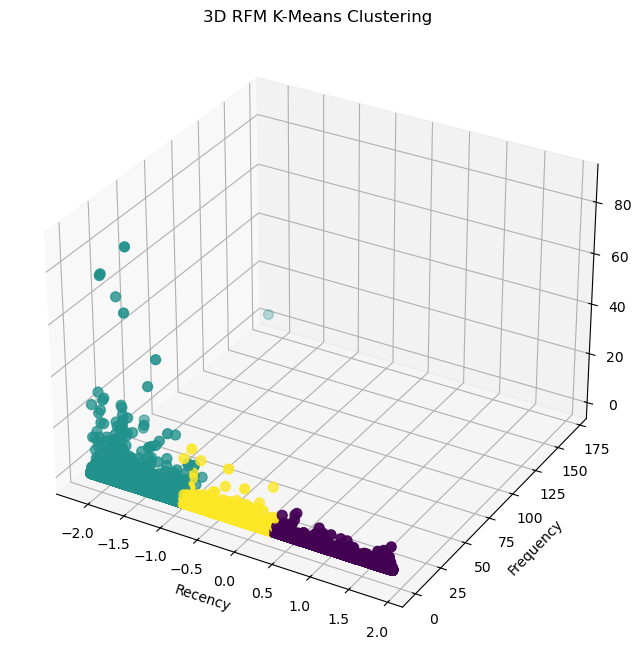

In [325]:
# generate 3D plot with scaled_features_minmax
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_features['r'],
                     scaled_features['f'],
                     scaled_features['m'],
                     c=scaled_features['k_means_clust'],
                     cmap='viridis', s=50)

# Axis Labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM K-Means Clustering')

plt.show()


https://medium.com/thedeephub/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-118f9ffcd9f0

### Kmean Clustering

In [316]:
# for num_clusters in range(2, 10):
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#     kmeans.fit(scaled_features[['recency', 'frequency', 'monetary']])
#     cluster_labels = kmeans.labels_
#     silhouette_avg = silhouette_score(scaled_features[['recency', 'frequency', 'monetary']], cluster_labels)
#     print(F"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

In [327]:
#assign customer segmentation based on overall score
ksegment_lst = scaled_features['k_means_clust']
ksegment_cluster = []

for i in ksegment_lst:
    if i == 2:
        cluster = 'loyal'
        ksegment_cluster.append(cluster)
    elif i == 1:
        cluster = 'best'
        ksegment_cluster.append(cluster)
    else:
        cluster = 'regular'
        ksegment_cluster.append(cluster)


In [328]:
scaled_features['k_means_segment'] = ksegment_cluster
scaled_features

,cust_id,r,f,m,k_means_clust,k_means_segment
0,4,-2.135036,2.465659,1.104669,1,best
1,15,0.418431,0.104072,-0.159017,0,regular
2,16,1.428715,1.048707,0.382779,0,regular
3,20,-2.135036,0.441441,1.166270,1,best
4,21,0.507247,-0.233298,-0.164215,0,regular
...,...,...,...,...,...,...
64243,115322,-2.146138,-0.165824,-0.159352,1,best
64244,115323,-2.146138,-0.233298,0.036417,1,best
64245,115324,-2.146138,-0.233298,-0.167242,1,best
64246,115325,-2.146138,-0.165824,-0.164918,1,best


In [330]:
# mearge data into overall
overall = overall.merge(scaled_features[['cust_id','r','f','m','k_means_clust','k_means_segment',]], on='cust_id')
overall.head()

,cust_id,last_purchase_timestamp,recency,frequency,monetary,r,f,m,k_means_clust,k_means_segment
0,4,2021-09-29,1,41,27394.190,-2.135036,2.465659,1.104669,1,best
1,15,2021-02-11,231,6,216.800,0.418431,0.104072,-0.159017,0,regular
2,16,2020-11-12,322,20,11868.899,1.428715,1.048707,0.382779,0,regular
3,20,2021-09-29,1,11,28719.018,-2.135036,0.441441,1.166270,1,best
4,21,2021-02-03,239,1,105.000,0.507247,-0.233298,-0.164215,0,regular


In [333]:
overall.to_csv("data/_user_segmentation.csv")

## RFM Analysis

In [332]:
# compare RFM and K-Means
# RFM Result
result = final_table.groupby(['segment'])['segment'].count()
values = list(result)
print(values)
labels = result.index
print(labels)

# K-Means Result
result = overall.groupby(['k_means_segment'])['k_means_segment'].count()
values = list(result)
print(values)
labels = result.index
print(labels)


[870, 5256, 1547, 1549, 2764, 4548, 558, 129, 1411, 188]
Index(['about to sleep', 'at risk', 'champions', 'do not lose', 'hibernating',
       'loyal customer', 'need attention', 'new customer',
       'potential customer', 'promising'],
      dtype='object', name='segment')
[13682, 24014, 26552]
Index(['best', 'loyal', 'regular'], dtype='object', name='k_means_segment')
